11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 - 42s - 50ms/step - accuracy: 0.9225 - loss: 0.2523 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 2/5
844/844 - 38s - 45ms/step - accuracy: 0.9744 - loss: 0.0865 - val_accuracy: 0.9892 - val_loss: 0.0367
Epoch 3/5
844/844 - 41s - 48ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9908 - val_loss: 0.0323
Epoch 4/5
844/844 - 41s - 49ms/step - accuracy: 0.9845 - loss: 0.0519 - val_accuracy: 0.9903 - val_loss: 0.0325
Epoch 5/5
844/844 - 38s - 45ms/step - accuracy: 0.9865 - loss: 0.0438 - val_accuracy: 0.9912 - val_loss: 0.0315
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9884 - loss: 0.0299
Test Accuracy: 0.9909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


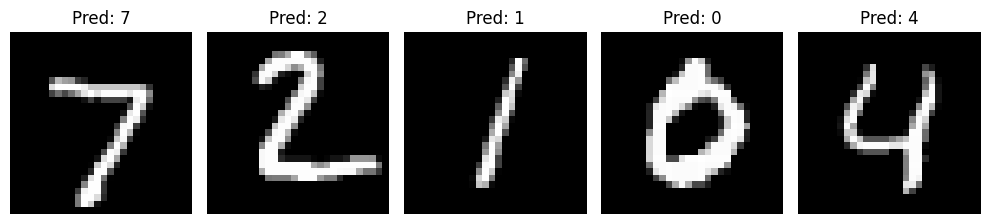

In [1]:

# Task 2: Deep Learning with TensorFlow - MNIST CNN Classifier

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict and visualize 5 test images
predictions = model.predict(x_test[:5])
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()
